<a href="https://colab.research.google.com/github/kennc05/household_electricity_forecasting/blob/main/2.%20Multiple%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multiple Linear Regression 

## 1. Import libraries 

In [ ]:
# to access google drive folder
from google.colab import drive
drive.mount("/content/drive") 
full_path = "/content/drive/MyDrive/Kenn @Newcastle Uni/20-21 - Year 3/CSC3032: Dissertation/Code/London Smart Meters/Datasets"

# import libraries needed 
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

# importing r2_score module
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# set pandas display options 
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Features to use based on correlation analysis

In [ ]:
#All features except temperatureLow as it is redundant
all_individual_features = ['day_of_week', 'day_of_month', 'month',
       'Acorn_grouped_Adversity', 'Acorn_grouped_Affluent',
       'Acorn_grouped_Comfortable', 'temperatureHigh',
       'dewPoint', 'cloudCover', 'windSpeed', 'pressure', 'visibility',
       'humidity', 'uvIndex', 'moonPhase', 'weather_type_clear-day',
       'weather_type_cloudy', 'weather_type_fog',
       'weather_type_partly-cloudy-day', 'weather_type_partly-cloudy-night',
       'weather_type_wind', 'public_holiday']

all_acorn_features = ['day_of_week', 'day_of_month', 'month', 'temperatureHigh',
       'dewPoint', 'cloudCover', 'windSpeed', 'pressure', 'visibility',
       'humidity', 'uvIndex', 'moonPhase', 'weather_type_clear-day',
       'weather_type_cloudy', 'weather_type_fog',
       'weather_type_partly-cloudy-day', 'weather_type_partly-cloudy-night',
       'weather_type_wind', 'public_holiday']


#---- Pearson correlation selection ----
#For all acorn combined dataset only
pearson_0 = ['Acorn_grouped_Affluent', 'humidity', 'cloudCover', 'weather_type_partly-cloudy-night', 
             'Acorn_grouped_Adversity','uvIndex', 'dewPoint', 'temperatureHigh']

pearson_1 = ['Acorn_grouped_Affluent', 'humidity', 'cloudCover', 'weather_type_partly-cloudy-night', 
             'Acorn_grouped_Adversity', 'uvIndex', 'dewPoint', 'temperatureHigh', 'public_holiday']

pearson_2 = ['Acorn_grouped_Affluent', 'humidity', 'cloudCover', 'weather_type_partly-cloudy-night', 
             'Acorn_grouped_Adversity', 'uvIndex', 'dewPoint', 'temperatureHigh', 'month', 'day_of_week']

pearson_3 = ['Acorn_grouped_Affluent', 'humidity', 'cloudCover', 'weather_type_partly-cloudy-night', 
             'Acorn_grouped_Adversity', 'uvIndex', 'dewPoint', 'temperatureHigh',  'month', 'day_of_week', 'public_holiday']
             
#For specific acorn datasets
pearson_4 = ['humidity', 'cloudCover', 'weather_type_partly-cloudy-night', 'weather_type_fog', 
             'visibility', 'uvIndex', 'dewPoint', 'temperatureHigh']

pearson_5 = ['humidity', 'cloudCover', 'weather_type_partly-cloudy-night', 'weather_type_fog', 
             'visibility', 'uvIndex', 'dewPoint', 'temperatureHigh', 'public_holiday']
        
pearson_6 = ['humidity', 'cloudCover', 'weather_type_partly-cloudy-night', 'weather_type_fog', 
             'visibility', 'uvIndex', 'dewPoint', 'temperatureHigh', 'day_of_week', 'month']

pearson_7 = ['humidity', 'cloudCover', 'weather_type_partly-cloudy-night', 'weather_type_fog', 
             'visibility', 'uvIndex', 'dewPoint', 'temperatureHigh', 'day_of_week', 'month', 'public_holiday']


#----- Mutual information feature selection ----
#For all acorn combined dataset only
mutual_information_0 = ['month', 'Acorn_grouped_Affluent', 'temperatureHigh', 'dewPoint', 'windSpeed', 
                        'pressure', 'visibility', 'uvIndex']

mutual_information_1 = ['month', 'Acorn_grouped_Affluent', 'temperatureHigh', 'dewPoint', 'windSpeed', 
                        'pressure', 'visibility', 'uvIndex', 'public_holiday']

mutual_information_2 = ['month', 'Acorn_grouped_Affluent', 'temperatureHigh', 'dewPoint', 'windSpeed', 
                        'pressure', 'visibility', 'uvIndex', 'day_of_week', 'month']

mutual_information_3 = ['month', 'Acorn_grouped_Affluent', 'temperatureHigh', 'dewPoint', 'windSpeed', 
                        'pressure', 'visibility', 'uvIndex', 'day_of_week', 'month', 'public_holiday']                                            


#----
#For specific acorn datasets
mutual_information_4 = ['month', 'temperatureHigh', 'dewPoint', 'windSpeed', 'pressure', 'visibility', 
                        'humidity', 'uvIndex']

mutual_information_5 = ['month', 'temperatureHigh', 'dewPoint', 'windSpeed', 'pressure', 'visibility', 
                        'humidity', 'uvIndex', 'public_holiday']

mutual_information_6 = ['day_of_week', 'month', 'temperatureHigh', 'dewPoint', 'windSpeed', 'pressure', 'visibility', 
                        'humidity', 'uvIndex', 'day_of_week', 'month']

mutual_information_7 = ['day_of_week', 'month', 'temperatureHigh', 'dewPoint', 'windSpeed', 'pressure', 'visibility', 
                        'humidity', 'uvIndex', 'day_of_week', 'month', 'public_holiday']


#For use when iterating through each of the feature selection groups
#For all acorn groups combined
individual_feature_groups_pearson = [pearson_0, pearson_1, pearson_2, pearson_3]
individual_feature_groups_mutual_information = [mutual_information_0, mutual_information_1, mutual_information_2, mutual_information_3]

#For all specific acorn groups
acorn_groups_pearson = [pearson_4, pearson_5, pearson_6, pearson_7] 
acorn_groups_mutual_information = [mutual_information_4, mutual_information_5, mutual_information_6, mutual_information_7]


#Households to test
affluent_1 = pd.read_csv(full_path + '/daily/individual_households_test/affluent/household_1.csv')
affluent_2 = pd.read_csv(full_path + '/daily/individual_households_test/affluent/household_2.csv')
affluent_3 = pd.read_csv(full_path + '/daily/individual_households_test/affluent/household_3.csv')

comfortable_1 = pd.read_csv(full_path + '/daily/individual_households_test/comfortable/household_1.csv')
comfortable_2 = pd.read_csv(full_path + '/daily/individual_households_test/comfortable/household_2.csv')
comfortable_3 = pd.read_csv(full_path + '/daily/individual_households_test/comfortable/household_3.csv')

adversity_1 = pd.read_csv(full_path + '/daily/individual_households_test/adversity/household_1.csv')
adversity_2 = pd.read_csv(full_path + '/daily/individual_households_test/adversity/household_2.csv')
adversity_3 = pd.read_csv(full_path + '/daily/individual_households_test/adversity/household_3.csv')


#Households to test
affluent_households_test = [affluent_1, affluent_2, affluent_3] 
comfortable_households_test = [comfortable_1, comfortable_2, comfortable_3] 
adversity_households_test = [adversity_1, adversity_2, adversity_3]

##3. Helper functions

In [ ]:
#Run the model and see performance for each group
def run_model(X_train, X_test, y_train, y_test, feature_groups, household_groups):
  #Store household predictions in arrays
  household_1_predictions = []
  household_2_predictions = []
  household_3_predictions = []

  print("-- Overall model performance per feature group: --\n")
  print("{:<15} {:<23} {:<23} {:<23} {:<23} {:<23}".format('Feature group', 'MAE', 'MAPE', 'MSE', 'RMSE', 'R2'))
  #Loop through each of the feature groups passed into the function 
  for i in range(0, len(feature_groups)):
    #Fit the data to the model 
    model = LinearRegression()
    model.fit(X_train[feature_groups[i]], y_train)

    #Create predictions for the test set
    y_pred = model.predict(X_test[feature_groups[i]])

    #Get performance metrics for each feature group in order of: #MAE, MAPE, MSE, RMSE, R2
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("{:<15} {:<23} {:<23} {:<23} {:<23} {:<23}".format(i, mae, mape, mse, rmse, r2))
    household_1_predictions.append(model.predict(household_groups[0][feature_groups[i]]))
    household_2_predictions.append(model.predict(household_groups[1][feature_groups[i]]))
    household_3_predictions.append(model.predict(household_groups[2][feature_groups[i]]))
  
  return household_1_predictions, household_2_predictions, household_3_predictions


#Get the performance metrics: MAE, MAPE, MSE, RMSE, R2
def get_performance(household_data, household_predictions):
  household_consumption = household_data['energy_sum']
  
  print("-- Test household forecasting performance per feature group: --\n")
  print("{:<15} {:<23} {:<23} {:<23} {:<23} {:<23}".format('Feature group', 'MAE', 'MAPE', 'MSE', 'RMSE', 'R2'))

  for i in range(0, len(household_predictions)):
    mae = mean_absolute_error(household_consumption, household_predictions[i])
    mape = mean_absolute_percentage_error(household_consumption, household_predictions[i])
    mse = mean_squared_error(household_consumption, household_predictions[i])
    rmse = np.sqrt(mse)
    r2 = r2_score(household_consumption, household_predictions[i])

    print("{:<15} {:<23} {:<23} {:<23} {:<23} {:<23}".format(i, mae, mape, mse, rmse, r2))

#Visualise the results against household prediction against each feature group
def visualise_results (household_data, household_predictions):
  household_data_consumption = household_data['energy_sum'] 
  household_data['day']=  pd.to_datetime(household_data['day'],format='%Y-%m-%d')

  plt.clf()
  plt.figure(figsize = (25,5))
  plt.plot(household_data['day'], household_data_consumption, label='Actual consumption')

  for i in range(0, len(household_predictions)):
    plt.plot(household_data['day'], household_predictions[i], label='Feature group '+str(i))

  plt.xlabel('day')
  plt.ylabel('energy used')
  plt.legend()
  plt.show()

#Save to .csv file for comparasion between models later
def save_best_results(household_predictions, best_feature_group, acorn_name, household_name):
  best_household_predictions = household_predictions[best_feature_group]
  np.savetxt(full_path + '/daily/individual_households_test/'+acorn_name+'/'+household_name+'_predictions_model1.csv', best_household_predictions, delimiter=",")


## All acorn groups combined


### 1.1 Load the full dataset

In [ ]:
X_train = pd.read_csv(full_path + '/daily/daily_individual_consumption_final_training.csv')
y_train = X_train['energy_sum']

X_test = pd.read_csv(full_path + '/daily/daily_individual_consumption_final_testing.csv')
y_test = X_test['energy_sum']

#Drop the unneeded energy_sum column in the X dataset
X_train.drop(['energy_sum'], axis=1, inplace=True)
X_test.drop(['energy_sum'], axis=1, inplace=True)

#Check layout
X_train.head()

LCLid       day_x  day_of_week  day_of_month  month  \
0  MAC004552  2012-01-01            6             1      1   
1  MAC004552  2012-01-02            0             2      1   
2  MAC004552  2012-01-03            1             3      1   
3  MAC004552  2012-01-04            2             4      1   
4  MAC004552  2012-01-05            3             5      1   

   Acorn_grouped_Adversity  Acorn_grouped_Affluent  Acorn_grouped_Comfortable  \
0                      0.0                     1.0                        0.0   
1                      0.0                     1.0                        0.0   
2                      0.0                     1.0                        0.0   
3                      0.0                     1.0                        0.0   
4                      0.0                     1.0                        0.0   

   temperatureLow  temperatureHigh  dewPoint  cloudCover  windSpeed  pressure  \
0            5.18            12.56      9.45        0.58       4.92   1004.82   
1            4.69             7.57      2.80        0.21       4.81   1008.49   
2            5.27            12.41      5.73        0.48       8.47   1003.23   
3            8.16             8.21      3.38        0.49       7.98   1014.07   
4            4.40            11.04      4.28        0.47       9.49   1004.74   

   visibility  humidity  uvIndex  moonPhase  weather_type_clear-day  \
0       12.33      0.90      1.0       0.26                     0.0   
1       13.23      0.81      1.0       0.29                     0.0   
2       10.80      0.82      1.0       0.32                     0.0   
3       12.62      0.78      1.0       0.35                     0.0   
4       12.92      0.70      1.0       0.38                     0.0   

   weather_type_cloudy  weather_type_fog  weather_type_partly-cloudy-day  \
0                  0.0               0.0                             1.0   
1                  0.0               0.0                             1.0   
2                  0.0               0.0                             0.0   
3                  0.0               0.0                             0.0   
4                  0.0               0.0                             0.0   

   weather_type_partly-cloudy-night  weather_type_wind  public_holiday  day_y  
0                               0.0                0.0               0    733  
1                               0.0                0.0               1    733  
2                               0.0                1.0               0    733  
3                               0.0                1.0               0    733  
4                               0.0                1.0               0    733

### 1.2 Fit and Plot results

#### Affluent households - pearson

-- Overall model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               5.815650291300232       155789447501784.5       81.15178939742358       9.008428797377686       0.05610916824813339    
1               5.8164594152963245      155822207022624.7       81.15745710555075       9.008743369946263       0.05604324613134459    
2               5.835792009952841       156754174084337.34      81.09949696028866       9.005525912476665       0.056717390843693094   
3               5.836897390292406       156820951602419.16      81.10391615786524       9.00577126946189        0.056665990374187736   


<Figure size 432x288 with 0 Axes>

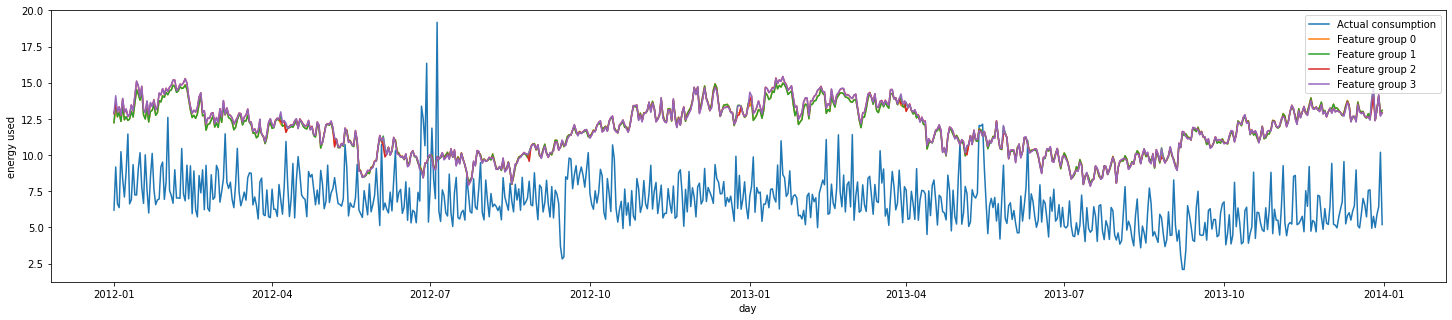

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               4.9509820196369505      0.8121550576930695      28.177356796560836      5.308234809855422       -8.340361952961059     
1               4.953308366373939       0.8123058174083672      28.191980374760615      5.3096120738487675      -8.345209445024262     
2               5.0256090426311575      0.8225707049875498      29.056672876635673      5.390424183367731       -8.631841757765187     
3               5.029777050100303       0.8229939560515475      29.093339338265917      5.393824184960604       -8.643996127872843     


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, y_train, y_test, individual_feature_groups_pearson, affluent_households_test)

#Pearson on individual results - all
visualise_results(affluent_households_test[0], household_1_predictions)

get_performance(affluent_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

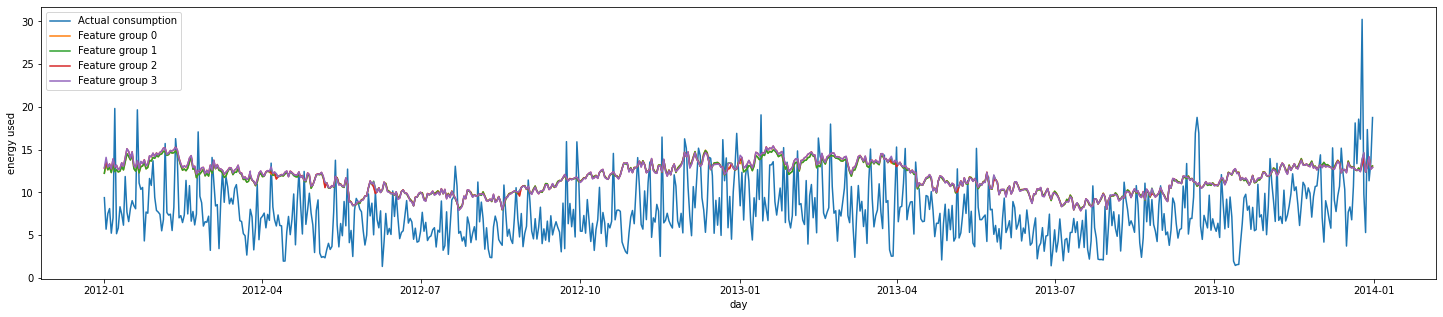

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               4.545800368007457       0.8668717124558414      26.337152312520992      5.131973529990289       -1.2395243518749441    
1               4.543605850614983       0.8668966483696051      26.324079095746168      5.130699669221165       -1.2384126983834376    
2               4.593137013591719       0.874184451490606       26.88191863191046       5.184777587506571       -1.2858474100354114    
3               4.588753969770531       0.874041138677793       26.8499742529295        5.181696078788248       -1.2831310869574843    


In [ ]:
#Pearson on individual results - all
visualise_results(affluent_households_test[1], household_2_predictions)

get_performance(affluent_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

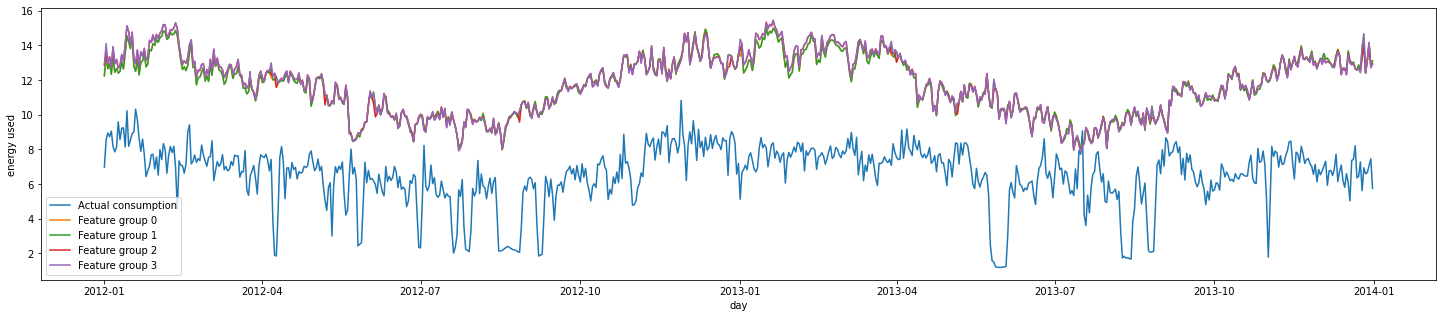

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               5.129660578379197       0.9934151786951803      28.875914223047758      5.3736313813889165      -9.018359078052736     
1               5.1315516464883535      0.9946534010090186      28.927962416830084      5.378472126620169       -9.036416947689268     
2               5.203139853989061       1.0034665687699595      29.7429395123005        5.45370878506549        -9.319169317700613     
3               5.20648386770123        1.0052411487483413      29.824035666456727      5.461138678559328       -9.347305236996903     


In [ ]:
#Pearson on individual results - all
visualise_results(affluent_households_test[2], household_3_predictions)

get_performance(affluent_households_test[2], household_3_predictions)

#### Comfortable households - pearson



-- Overall model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               5.815650291300232       155789447501784.5       81.15178939742358       9.008428797377686       0.05610916824813339    
1               5.8164594152963245      155822207022624.7       81.15745710555075       9.008743369946263       0.05604324613134459    
2               5.835792009952841       156754174084337.34      81.09949696028866       9.005525912476665       0.056717390843693094   
3               5.836897390292406       156820951602419.16      81.10391615786524       9.00577126946189        0.056665990374187736   


<Figure size 432x288 with 0 Axes>

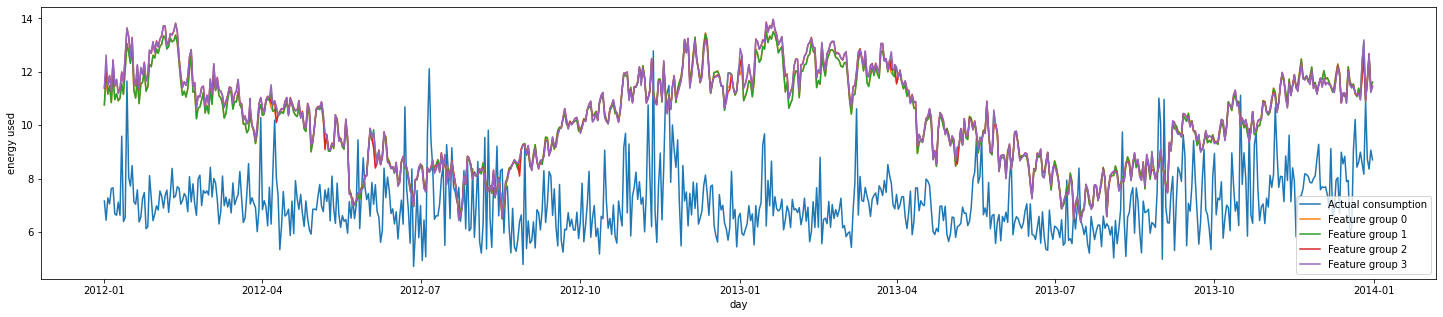

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               3.2209658851145635      0.4756371184520399      13.011975576485131      3.6072116068349986      -8.55328733440513      
1               3.224017881842356       0.47605440759788153     13.036757132699869      3.610644974613243       -8.571481752748562     
2               3.305536749931083       0.4878208532953449      13.799307854243086      3.714741963345918       -9.131340331266442     
3               3.3108913798583246      0.48857081861793616     13.844061532756838      3.7207608808893964      -9.164198120431532     


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, y_train, y_test, individual_feature_groups_pearson, comfortable_households_test)

#Pearson on individual results - all
visualise_results(comfortable_households_test[0], household_1_predictions)

get_performance(comfortable_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

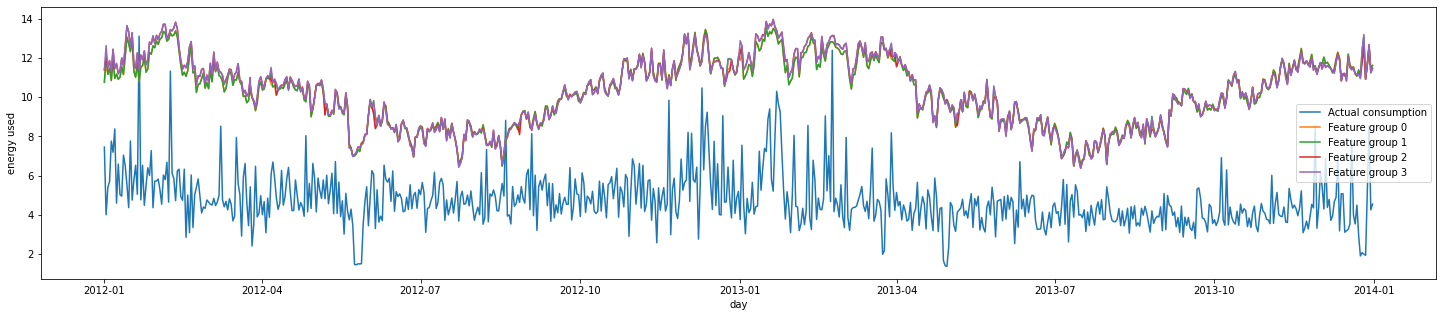

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               5.468008357552113       1.303346269531582       33.06705439013537       5.750396020287243       -15.877241981392498    
1               5.4700473647509735      1.3040434665424225      33.10250294773099       5.753477465649013       -15.89533472946053     
2               5.54752663195665        1.3198206044104752      34.12317877207596       5.841504837974198       -16.416282034557238    
3               5.551030062656801       1.320878578042916       34.182799909979146      5.846605845272892       -16.446712334145648    


In [ ]:
#Pearson on individual results - all
visualise_results(comfortable_households_test[1], household_2_predictions)

get_performance(comfortable_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

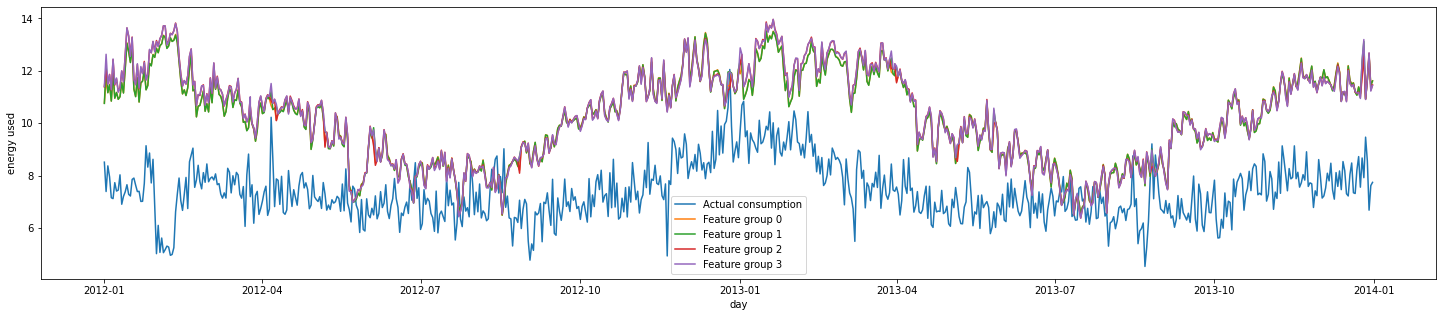

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.859327353794756       0.3992821960642492      10.11257773170667       3.18002794511411        -8.02635514315336      
1               2.858915615846406       0.39918087434244653     10.111478824905117      3.179855157849979       -8.025374273258144     
2               2.94424929367411        0.410292249674657       10.747823691018445      3.2783873613437513      -8.59336741085867      
3               2.9454740416589393      0.4103975557515985      10.757703599707694      3.2798938397008666      -8.60218608864559      


In [ ]:
#Pearson on individual results - all
visualise_results(comfortable_households_test[2], household_3_predictions)

get_performance(comfortable_households_test[2], household_3_predictions)

#### Adversity households - pearson


-- Overall model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               5.815650291300232       155789447501784.5       81.15178939742358       9.008428797377686       0.05610916824813339    
1               5.8164594152963245      155822207022624.7       81.15745710555075       9.008743369946263       0.05604324613134459    
2               5.835792009952841       156754174084337.34      81.09949696028866       9.005525912476665       0.056717390843693094   
3               5.836897390292406       156820951602419.16      81.10391615786524       9.00577126946189        0.056665990374187736   


<Figure size 432x288 with 0 Axes>

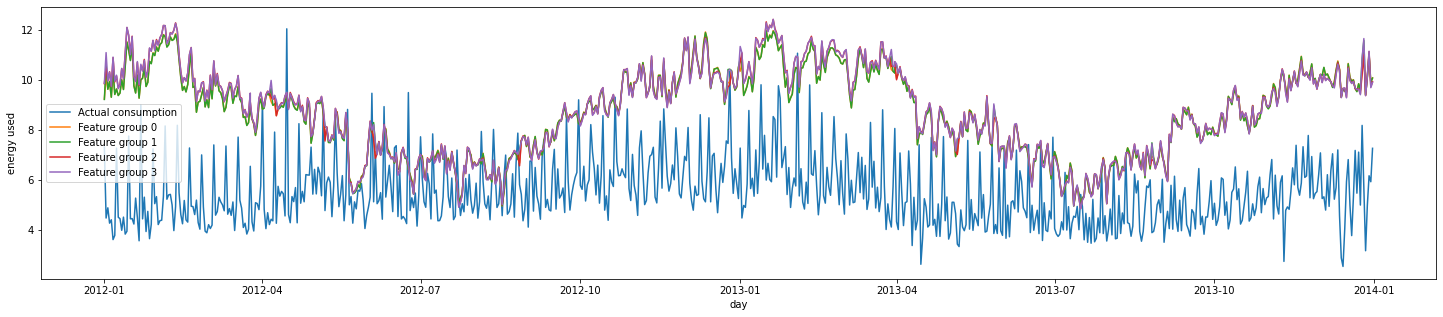

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               3.2677398183700537      0.658838996181317       13.48355587489519       3.6719961703268686      -6.527581185861242     
1               3.2691511246341247      0.659293491802046       13.506483150069657      3.6751167532569164      -6.540380993778953     
2               3.3430291777871597      0.6729629988100596      14.193543051852481      3.767431890804727       -6.923951858779745     
3               3.344322746215692       0.673359621189072       14.219595257800819      3.7708878606769547      -6.93849624878832      


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, y_train, y_test, individual_feature_groups_pearson, adversity_households_test)

#Pearson on individual results - all
visualise_results(adversity_households_test[0], household_1_predictions)

get_performance(adversity_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

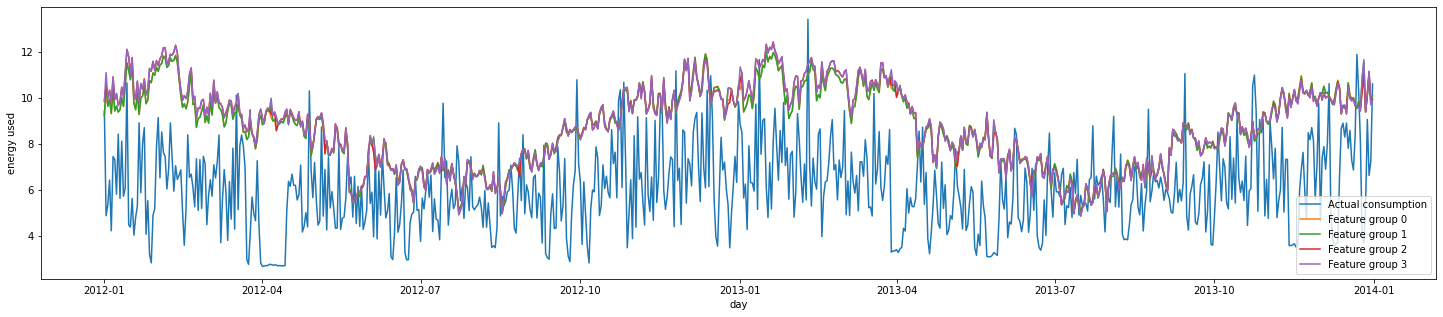

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.872746560176388       0.5944492200330597      11.597459142032431      3.4055042419636523      -2.5834298421833237    
1               2.8735231004374726      0.5952081304822422      11.642803344147195      3.4121552344738353      -2.597440477188636     
2               2.949840328826211       0.6086610688746608      12.253424693975466      3.5004892078073127      -2.7861127320723402    
3               2.9513255599377555      0.6097749278054864      12.31952201394355       3.5099176648382437      -2.8065357493868435    


In [ ]:
#Pearson on individual results - all
visualise_results(adversity_households_test[1], household_2_predictions)

get_performance(adversity_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

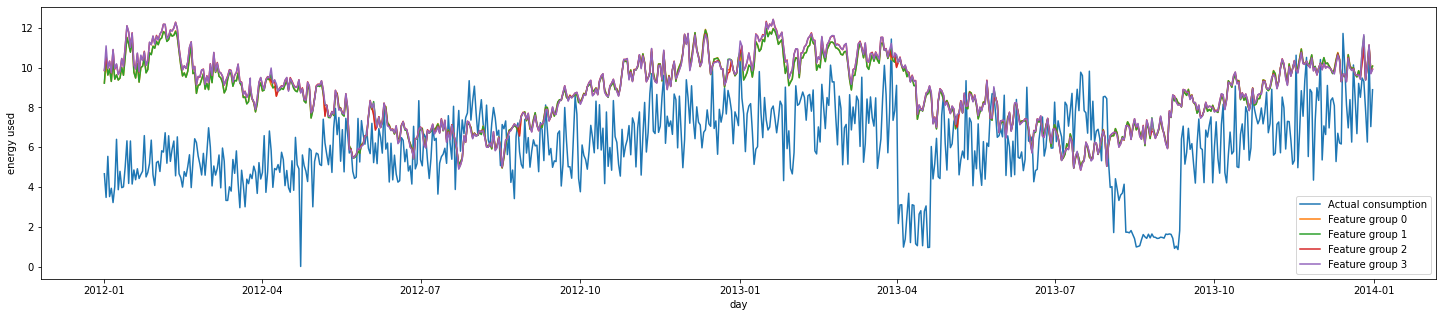

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.903363142478526       3.7449977082329085      11.926193947726656      3.4534321982234797      -2.0867421706337095    
1               2.9033519693260534      3.7405733454332304      11.918726549824287      3.452350872930544       -2.0848094557951637    
2               2.985996520143834       3.748686269088998       12.65576086963754       3.557493621868849       -2.2755689660080227    
3               2.9878704443093778      3.735298824934086       12.651700370443976      3.5569228794625243      -2.274518026022514     


In [ ]:
#Pearson on individual results - all
visualise_results(adversity_households_test[2], household_3_predictions)

get_performance(adversity_households_test[2], household_3_predictions)

#### Affluent households - mutual information 

-- Overall model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               5.895387566864048       160403260267505.66      81.54565604781948       9.030263343215383       0.05152803549675489    
1               5.896259219865349       160434741894554.56      81.55651742934543       9.03086471105317        0.05140170484503881    
2               5.893171423565357       160453782283624.53      81.52563822827287       9.029154901111891       0.051760866300388564   
3               5.893866455115475       160501166783012.47      81.53581719021716       9.029718555426696       0.05164247299166047    


<Figure size 432x288 with 0 Axes>

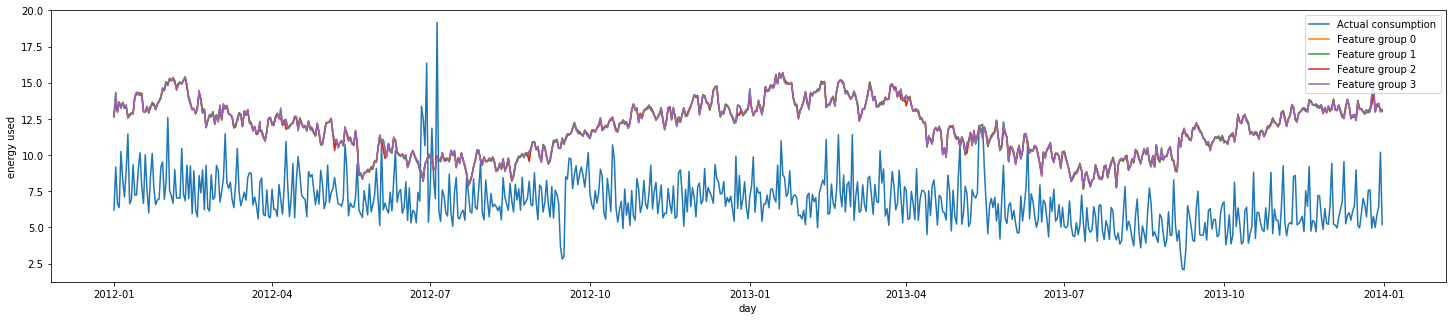

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               5.078228233185152       0.8304143641200755      29.721300044553477      5.451724501894192       -8.852155478350982     
1               5.081314013569094       0.8306967181136481      29.748221378077687      5.454193008876537       -8.861079487838031     
2               5.078037263567843       0.8307574047575682      29.734173338335314      5.452905036614457       -8.856422777953187     
3               5.081760335889442       0.8311626655011422      29.769446134452654      5.456138390331815       -8.868115169301587     


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, y_train, y_test, individual_feature_groups_mutual_information, affluent_households_test)

#Pearson on individual results - all
visualise_results(affluent_households_test[0], household_1_predictions)

get_performance(affluent_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

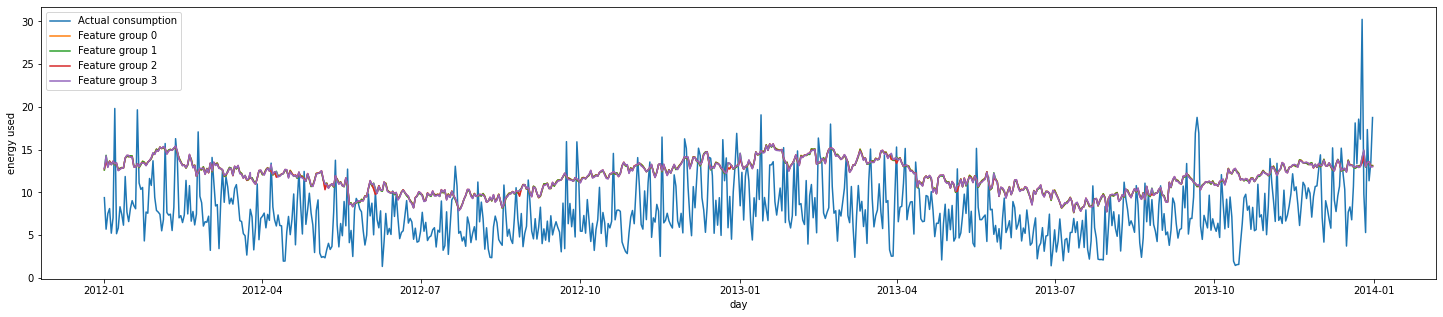

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               4.643453717860624       0.8820793316718033      27.534020137646163      5.247286931133666       -1.3412974900083756    
1               4.64155124256517        0.882175885672467       27.527195854442773      5.246636623060794       -1.340717201439713     
2               4.627905514861183       0.8801778579489631      27.358976391674442      5.230580884727282       -1.326413013239765     
3               4.622698716378916       0.8799429881392303      27.31949092942474       5.226805040311408       -1.3230554500072662    


In [ ]:
#Pearson on individual results - all
visualise_results(affluent_households_test[1], household_2_predictions)

get_performance(affluent_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

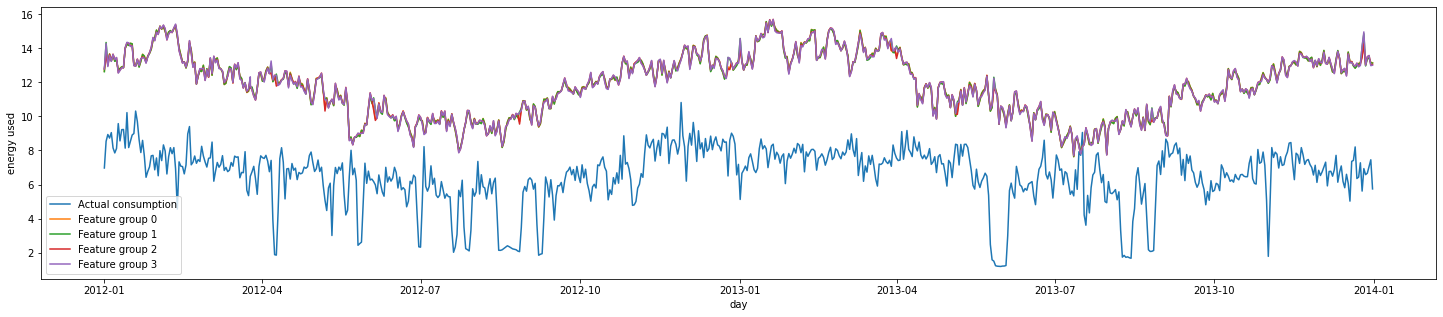

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               5.255661196974508       1.0107607565186578      30.382492834129         5.512031643063109       -9.541059256081345     
1               5.258020338217258       1.0121042974630452      30.445761694404123      5.517767818094933       -9.5630100818041       
2               5.253716514591733       1.0111685663183345      30.384072133686903      5.512174900498614       -9.541607186440906     
3               5.256240608088749       1.0128775475064578      30.461578628115845      5.519200904851702       -9.568497690619314     


In [ ]:
#Pearson on individual results - all
visualise_results(affluent_households_test[2], household_3_predictions)

get_performance(affluent_households_test[2], household_3_predictions)

#### Comfortable households - mutual information



-- Overall model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               5.895387566864048       160403260267505.66      81.54565604781948       9.030263343215383       0.05152803549675489    
1               5.896259219865349       160434741894554.56      81.55651742934543       9.03086471105317        0.05140170484503881    
2               5.893171423565357       160453782283624.53      81.52563822827287       9.029154901111891       0.051760866300388564   
3               5.893866455115475       160501166783012.47      81.53581719021716       9.029718555426696       0.05164247299166047    


<Figure size 432x288 with 0 Axes>

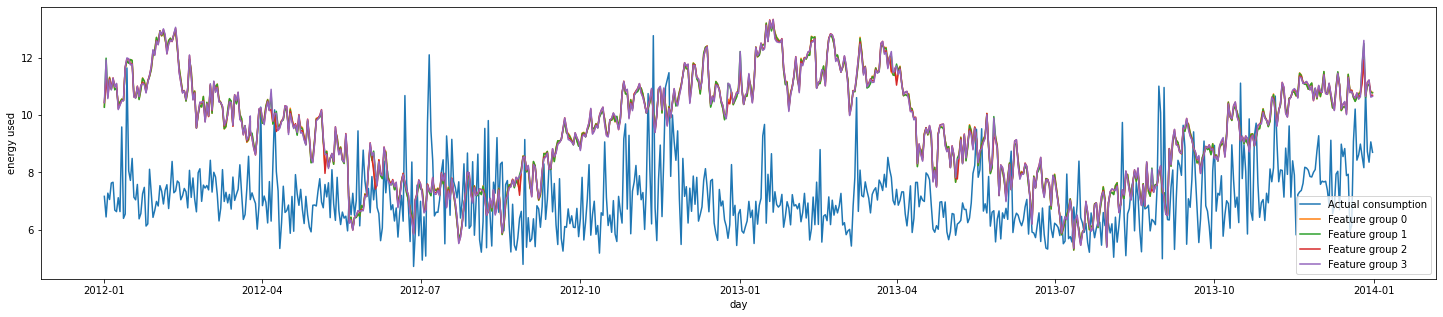

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.6189571983206745      0.38482105032364833     9.341436198785127       3.0563763182542045      -5.858406980434401     
1               2.623181838519979       0.3853763047264591      9.3698955707923         3.0610285151877137      -5.879301621416712     
2               2.6203875841005204      0.3850945187465421      9.339204243979516       3.0560111655521673      -5.8567682972498165    
3               2.625697176402558       0.38580878249900835     9.373641157259481       3.061640272347403       -5.882051600737415     


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, y_train, y_test, individual_feature_groups_mutual_information, comfortable_households_test)

#Pearson on individual results - all
visualise_results(comfortable_households_test[0], household_1_predictions)

get_performance(comfortable_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

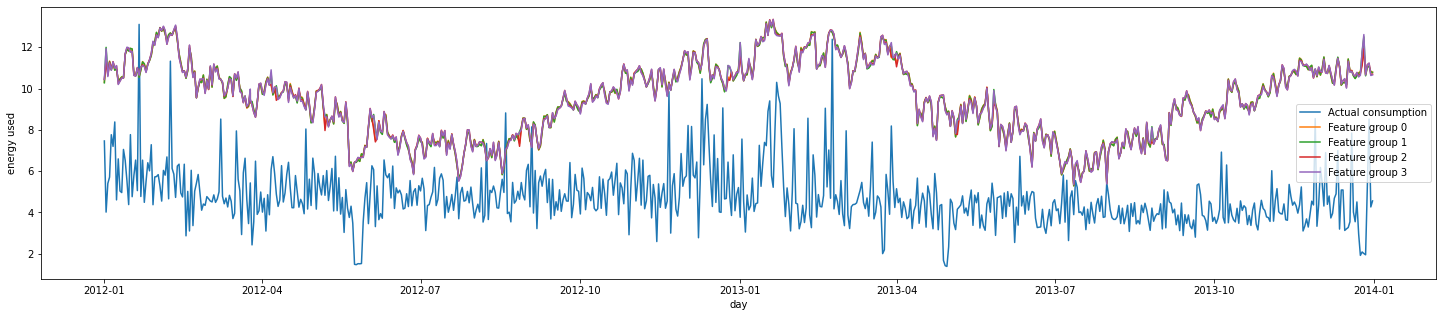

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               4.732280260079236       1.1350758940082322      25.88136170830305       5.087372770723908       -12.209704112298715    
1               4.735051533639852       1.135916368046966       25.923571758557042      5.09151959227862        -12.231247888886081    
2               4.730081378515029       1.134475347011946       25.856833208295907      5.084961475596045       -12.197184901328878    
3               4.733061745038481       1.1353911195662307      25.9040182589025        5.0895990273205705      -12.22126789062681     


In [ ]:
#Pearson on individual results - all
visualise_results(comfortable_households_test[1], household_2_predictions)

get_performance(comfortable_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

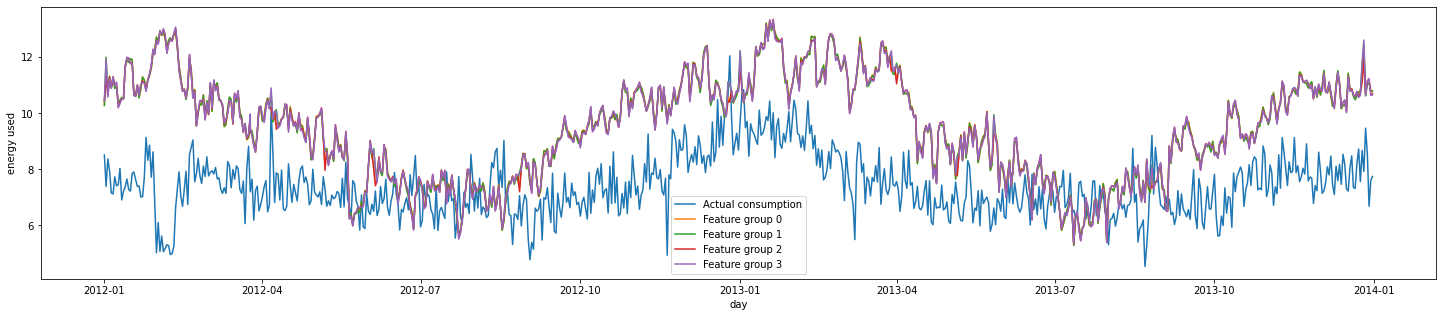

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.2294496978619587      0.3107475704890539      6.782340477478183       2.6042927019592446      -5.053828754221158     
1               2.230015434750275       0.3108011198729352      6.7853166396102305      2.604864034764623       -5.056485237768695     
2               2.2308086961872786      0.310970218260236       6.778859612223436       2.603624322405872       -5.050721779241249     
3               2.2319902164528838      0.31112190441491244     6.782044053196029       2.6042357906295712      -5.053564169768532     


In [ ]:
#Pearson on individual results - all
visualise_results(comfortable_households_test[2], household_3_predictions)

get_performance(comfortable_households_test[2], household_3_predictions)

#### Adversity households - mutual information 


-- Overall model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               5.895387566864048       160403260267505.66      81.54565604781948       9.030263343215383       0.05152803549675489    
1               5.896259219865349       160434741894554.56      81.55651742934543       9.03086471105317        0.05140170484503881    
2               5.893171423565357       160453782283624.53      81.52563822827287       9.029154901111891       0.051760866300388564   
3               5.893866455115475       160501166783012.47      81.53581719021716       9.029718555426696       0.05164247299166047    


<Figure size 432x288 with 0 Axes>

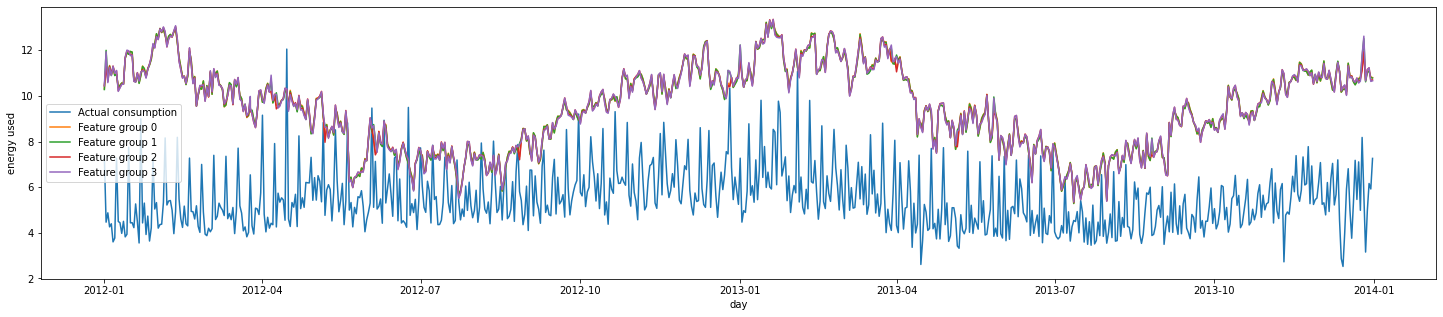

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               4.018163281197875       0.8057845829117825      19.597489206942026      4.4269051499825505      -9.940859548701374     
1               4.021465350972949       0.8065181173142479      19.634846537670278      4.431122491837737       -9.961715348354904     
2               4.011024279660769       0.8035996256940111      19.490150830211032      4.414765093434874       -9.880934826120923     
3               4.0138988484586475      0.8041207122386403      19.516590080800995      4.417758490547101       -9.895695294884199     


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, y_train, y_test, individual_feature_groups_mutual_information, adversity_households_test)

#Pearson on individual results - all
visualise_results(adversity_households_test[0], household_1_predictions)

get_performance(adversity_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

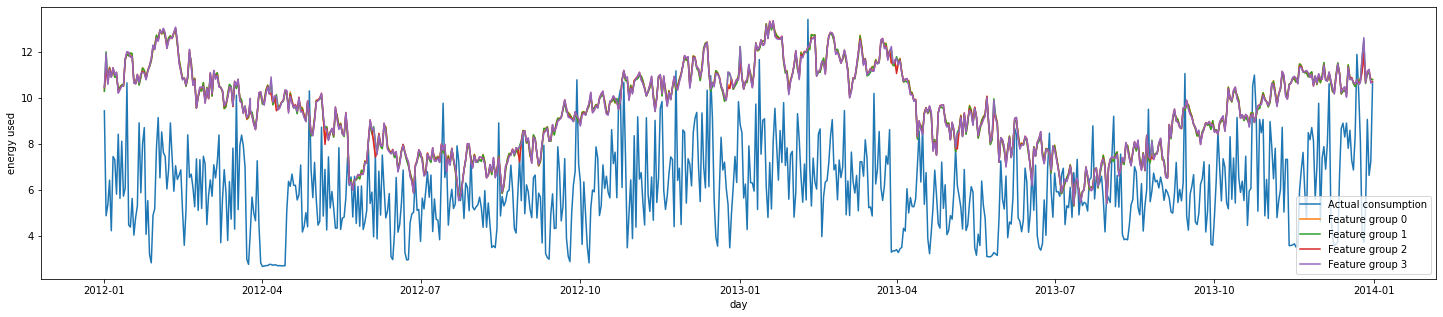

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               3.5616423241484334      0.7255633520760406      16.78100556920046       4.096462567777284       -4.185062986820681     
1               3.565059957042663       0.7267468489890649      16.841386944220336      4.1038258910704695      -4.203719868341746     
2               3.5576145080698014      0.7252086234896367      16.761852315233636      4.094124120643344       -4.179144936927244     
3               3.560484095103086       0.7265086540055253      16.832126103248         4.102697417949318       -4.200858416234214     


In [ ]:
#Pearson on individual results - all
visualise_results(adversity_households_test[1], household_2_predictions)

get_performance(adversity_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

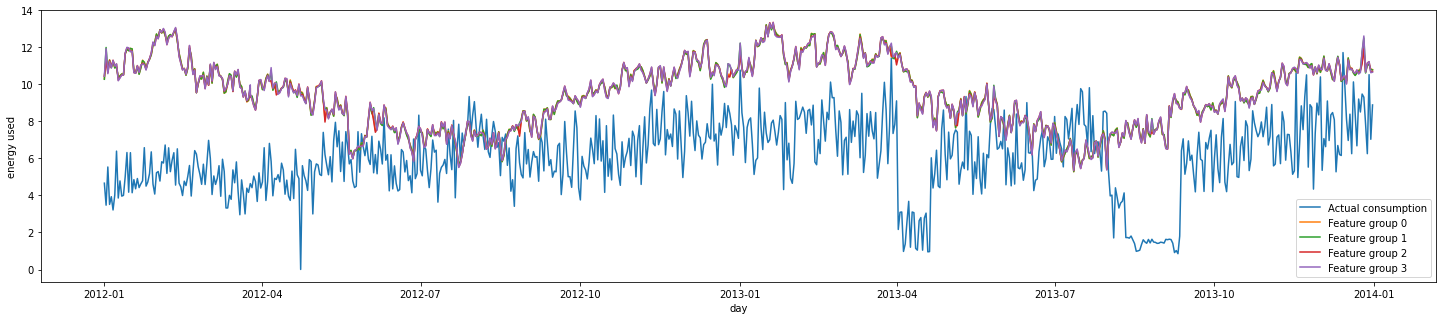

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               3.573759822431387       4.161883116727348       17.128044857551647      4.138604216103739       -3.4330872526509975    
1               3.5775336288112407      4.151411604090733       17.135178051064536      4.139465913745943       -3.4349334685790662    
2               3.570084705140236       4.107490603485989       17.069776448803882      4.131558598011637       -3.418006200365098     
3               3.574316789723611       4.085036592371096       17.068206252768025      4.131368568981473       -3.4175998016144753    


In [ ]:
#Pearson on individual results - all
visualise_results(adversity_households_test[2], household_3_predictions)

get_performance(adversity_households_test[2], household_3_predictions)

## Affluent dataset only


### 1.1 Load the full dataset

In [ ]:
X_train = pd.read_csv(full_path + '/daily/daily_affluent_training.csv')
y_train = X_train['energy_sum']

X_test = pd.read_csv(full_path + '/daily/daily_affluent_testing.csv')
y_test = X_test['energy_sum']

#Drop the unneeded energy_sum column in the X dataset
X_train.drop(['energy_sum'], axis=1, inplace=True)
X_test.drop(['energy_sum'], axis=1, inplace=True)

#Check layout
X_train.head()

LCLid       day_x  day_of_week  day_of_month  month  \
0  MAC004552  2012-01-01            6             1      1   
1  MAC004552  2012-01-02            0             2      1   
2  MAC004552  2012-01-03            1             3      1   
3  MAC004552  2012-01-04            2             4      1   
4  MAC004552  2012-01-05            3             5      1   

   Acorn_grouped_Adversity  Acorn_grouped_Affluent  Acorn_grouped_Comfortable  \
0                      0.0                     1.0                        0.0   
1                      0.0                     1.0                        0.0   
2                      0.0                     1.0                        0.0   
3                      0.0                     1.0                        0.0   
4                      0.0                     1.0                        0.0   

   temperatureLow  temperatureHigh  dewPoint  cloudCover  windSpeed  pressure  \
0            5.18            12.56      9.45        0.58       4.92   1004.82   
1            4.69             7.57      2.80        0.21       4.81   1008.49   
2            5.27            12.41      5.73        0.48       8.47   1003.23   
3            8.16             8.21      3.38        0.49       7.98   1014.07   
4            4.40            11.04      4.28        0.47       9.49   1004.74   

   visibility  humidity  uvIndex  moonPhase  weather_type_clear-day  \
0       12.33      0.90      1.0       0.26                     0.0   
1       13.23      0.81      1.0       0.29                     0.0   
2       10.80      0.82      1.0       0.32                     0.0   
3       12.62      0.78      1.0       0.35                     0.0   
4       12.92      0.70      1.0       0.38                     0.0   

   weather_type_cloudy  weather_type_fog  weather_type_partly-cloudy-day  \
0                  0.0               0.0                             1.0   
1                  0.0               0.0                             1.0   
2                  0.0               0.0                             0.0   
3                  0.0               0.0                             0.0   
4                  0.0               0.0                             0.0   

   weather_type_partly-cloudy-night  weather_type_wind  public_holiday  day_y  
0                               0.0                0.0               0    733  
1                               0.0                0.0               1    733  
2                               0.0                1.0               0    733  
3                               0.0                1.0               0    733  
4                               0.0                1.0               0    733

### 1.2 Fit and Plot results

#### Affluent households - pearson

-- Overall model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               7.37928060717557        171176309698622.34      132.8713676295043       11.526984325030737      0.042652000183163175   
1               7.380803233332948       171218488334481.38      132.88102827991082      11.527403362419085      0.04258239448474499    
2               7.3973851957668995      171992979961275.56      132.78384859643384      11.523187432148877      0.04328258126884543    
3               7.3989312035831984      172039678053591.9       132.79463740775836      11.523655557493827      0.04320484708783867    


<Figure size 432x288 with 0 Axes>

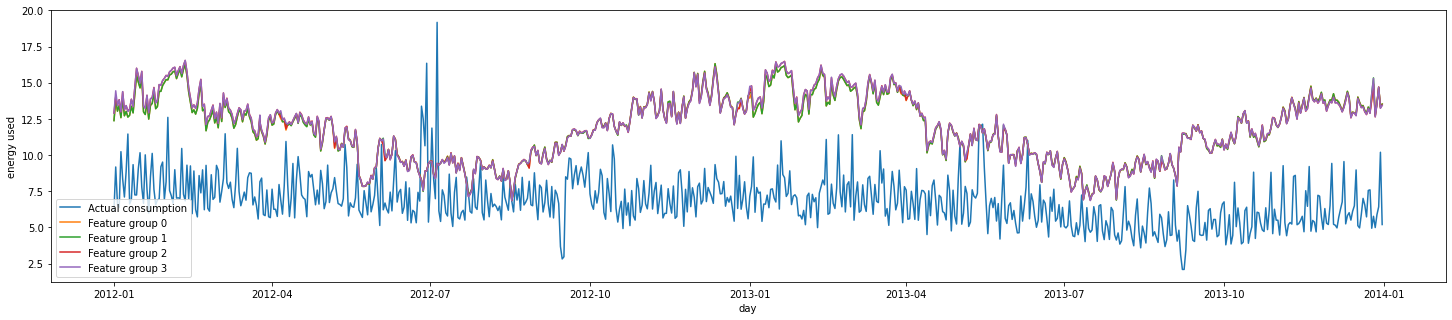

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               5.078743577070778       0.8249289750871017      30.83796209329797       5.553193864191846       -9.222311834382277     
1               5.081912081583361       0.8252603253940461      30.869504165714428      5.556033132164929       -9.232767547998119     
2               5.146825424935025       0.8341489354994759      31.68884723371687       5.629284788826807       -9.504367218401784     
3               5.150155037558692       0.8345412341111644      31.72363770757675       5.632374073832166       -9.515899727313547     


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, y_train, y_test, acorn_groups_pearson, affluent_households_test)

#Pearson on individual results - all
visualise_results(affluent_households_test[0], household_1_predictions)

get_performance(affluent_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

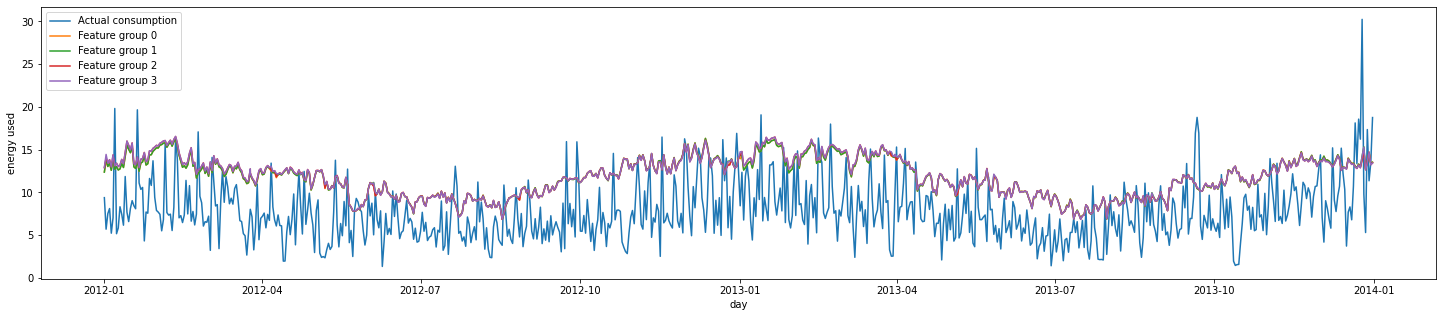

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               4.631044915288172       0.8703389178235555      27.97850304180266       5.289470960483918       -1.3790931588809494    
1               4.629987575179804       0.8704914464819712      27.985067517813633      5.29009144701806        -1.3796513552914575    
2               4.689625507915545       0.8786454830690069      28.663645358773625      5.353843979681667       -1.4373527947424551    
3               4.686739928429907       0.8785873811727264      28.650771713739104      5.352641564100767       -1.436258111414125     


In [ ]:
#Pearson on individual results - all
visualise_results(affluent_households_test[1], household_2_predictions)

get_performance(affluent_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

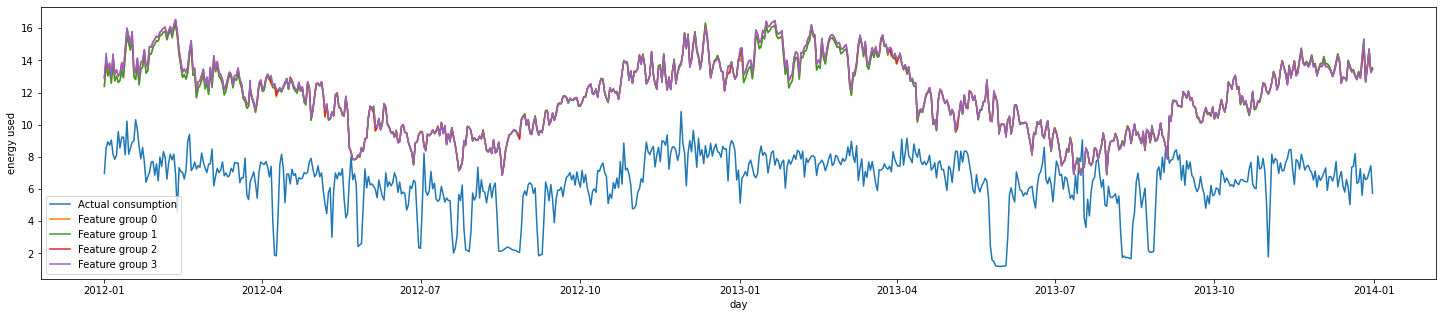

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               5.254954154091922       0.9954818781599644      31.136291724724813      5.579990297905975       -9.802586143171176     
1               5.257742032896015       0.9965819495343501      31.193944916604035      5.585153974296862       -9.822588639846446     
2               5.3236074659798645      1.0044218804744163      31.98936828253457       5.655914451486565       -10.098556937764611    
3               5.326472598197446       1.005655929571942       32.05069673126618       5.661333476422863       -10.119834547067205    


In [ ]:
#Pearson on individual results - all
visualise_results(affluent_households_test[2], household_3_predictions)

get_performance(affluent_households_test[2], household_3_predictions)

#### Affluent households - mutual information 

-- Overall model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               7.3981949753105845      171932389188627.25      132.78656573516386      11.523305330293208      0.04326300408397232    
1               7.399177508433423       171964908729521.16      132.79554964990749      11.523695138709089      0.04319827431589851    
2               7.39801151040673        171934540428225.38      132.78574679887836      11.523269796324234      0.043268904580286094   
3               7.399006992239761       171966864231054.72      132.79451485114782      11.523650239882667      0.04320573011725315    


<Figure size 432x288 with 0 Axes>

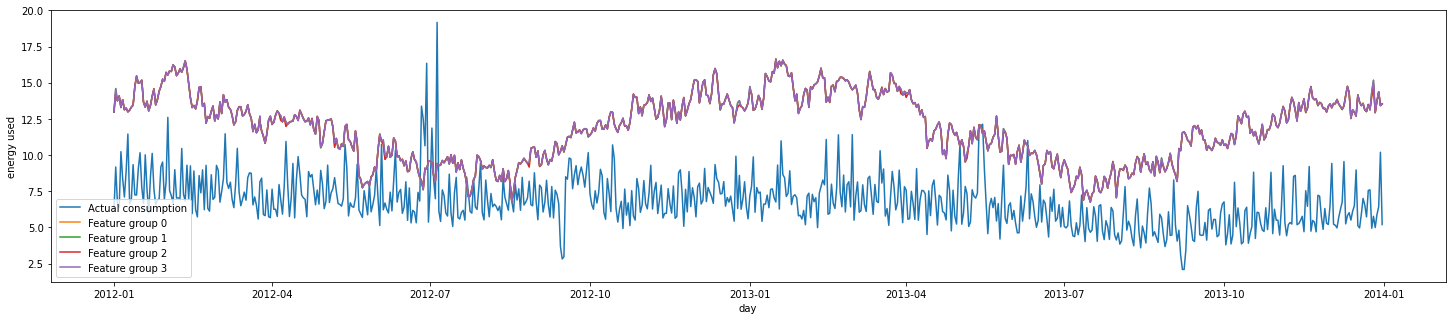

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               5.146547831627051       0.8345044770269269      31.69085650198714       5.629463251677476       -9.505033260040834     
1               5.148632750897292       0.8347359848278876      31.71094225424944       5.631246953761613       -9.511691379096568     
2               5.146343917027838       0.8345335918538291      31.690376066899166      5.629420580033008       -9.50487400317196      
3               5.148543755829149       0.8348075635667158      31.715941176207018      5.631690791956446       -9.513348445115765     


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, y_train, y_test, acorn_groups_mutual_information, affluent_households_test)

#Pearson on individual results - all
visualise_results(affluent_households_test[0], household_1_predictions)

get_performance(affluent_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

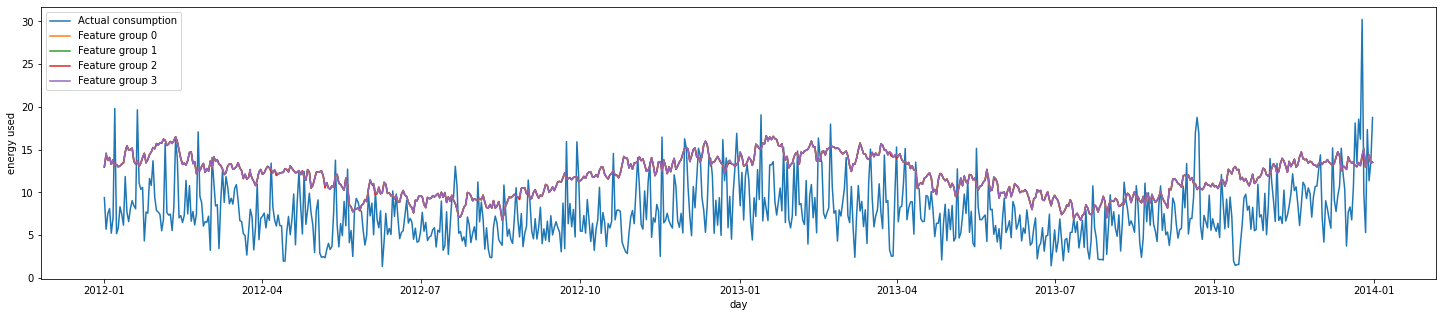

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               4.682415708904106       0.8781110864018175      28.617370632957545      5.349520598423521       -1.4334179207624702    
1               4.6813708850489935      0.8781946967555496      28.61838943025447       5.349615820809422       -1.4335045520477743    
2               4.680453792073581       0.8778639704472095      28.592715510753806      5.347215678346424       -1.4313214243030754    
3               4.677866747049814       0.8777454102970524      28.577251886728888      5.345769531763307       -1.4300065075588089    


In [ ]:
#Pearson on individual results - all
visualise_results(affluent_households_test[1], household_2_predictions)

get_performance(affluent_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

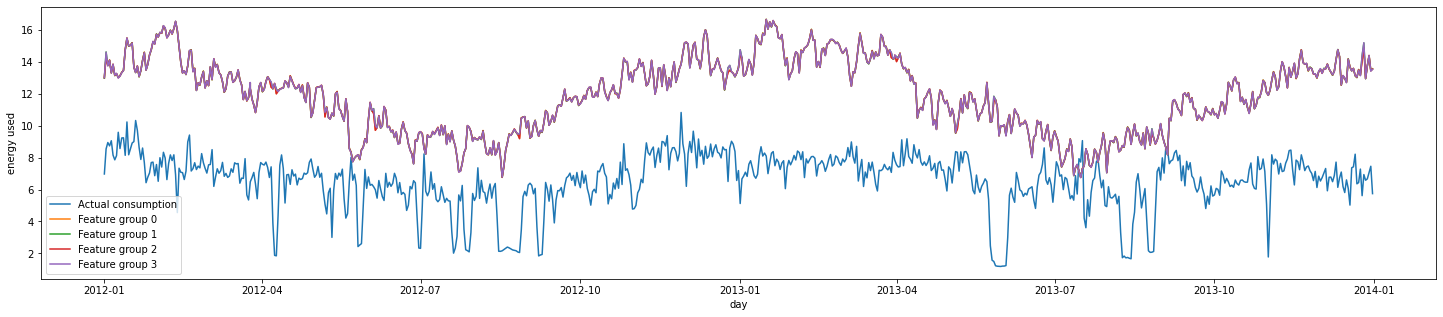

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               5.322698963276779       1.0035827384500235      31.95423051755855       5.652807312969243       -10.08636605978891     
1               5.3244491512710415      1.0043760849234757      31.99297491160485       5.656233279454168       -10.099808240314145    
2               5.322550972115845       1.0036604036530659      31.952504516656575      5.652654643320833       -10.085767232106038    
3               5.324392084562193       1.004536832892309       31.995864070121353      5.656488669671438       -10.10081061991772     


In [ ]:
#Pearson on individual results - all
visualise_results(affluent_households_test[2], household_2_predictions)

get_performance(affluent_households_test[2], household_2_predictions)

#### Save the best feature group set

In [ ]:
household_1_predictions, household_2_predictions, household_3_predictions

#Household1
save_best_results(household_1_predictions, 0, "affluent", "household_1")
save_best_results(household_2_predictions, 0, "affluent", "household_2")
save_best_results(household_3_predictions, 0, "affluent", "household_3")

## Comfortable dataset only


### 1.1 Load the full dataset

In [ ]:
X_train = pd.read_csv(full_path + '/daily/daily_comfortable_training.csv')
y_train = X_train['energy_sum']

X_test = pd.read_csv(full_path + '/daily/daily_comfortable_testing.csv')
y_test = X_test['energy_sum']

#Drop the unneeded energy_sum column in the X dataset
X_train.drop(['energy_sum'], axis=1, inplace=True)
X_test.drop(['energy_sum'], axis=1, inplace=True)

#Check layout
X_train.head()

LCLid       day_x  day_of_week  day_of_month  month  \
0  MAC000241  2012-01-01            6             1      1   
1  MAC000241  2012-01-02            0             2      1   
2  MAC000241  2012-01-03            1             3      1   
3  MAC000241  2012-01-04            2             4      1   
4  MAC000241  2012-01-05            3             5      1   

   Acorn_grouped_Adversity  Acorn_grouped_Affluent  Acorn_grouped_Comfortable  \
0                      0.0                     0.0                        1.0   
1                      0.0                     0.0                        1.0   
2                      0.0                     0.0                        1.0   
3                      0.0                     0.0                        1.0   
4                      0.0                     0.0                        1.0   

   temperatureLow  temperatureHigh  dewPoint  cloudCover  windSpeed  pressure  \
0            5.18            12.56      9.45        0.58       4.92   1004.82   
1            4.69             7.57      2.80        0.21       4.81   1008.49   
2            5.27            12.41      5.73        0.48       8.47   1003.23   
3            8.16             8.21      3.38        0.49       7.98   1014.07   
4            4.40            11.04      4.28        0.47       9.49   1004.74   

   visibility  humidity  uvIndex  moonPhase  weather_type_clear-day  \
0       12.33      0.90      1.0       0.26                     0.0   
1       13.23      0.81      1.0       0.29                     0.0   
2       10.80      0.82      1.0       0.32                     0.0   
3       12.62      0.78      1.0       0.35                     0.0   
4       12.92      0.70      1.0       0.38                     0.0   

   weather_type_cloudy  weather_type_fog  weather_type_partly-cloudy-day  \
0                  0.0               0.0                             1.0   
1                  0.0               0.0                             1.0   
2                  0.0               0.0                             0.0   
3                  0.0               0.0                             0.0   
4                  0.0               0.0                             0.0   

   weather_type_partly-cloudy-night  weather_type_wind  public_holiday  day_y  
0                               0.0                0.0               0    419  
1                               0.0                0.0               1    419  
2                               0.0                1.0               0    419  
3                               0.0                1.0               0    419  
4                               0.0                1.0               0    419

### 1.2 Fit and Plot results

#### Comfortable households - pearson



-- Overall model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               5.102158394650927       94702926974864.0        58.130590434725185      7.624341967325782       0.040179584015050396   
1               5.104135853272964       94756156481124.89       58.133854066882186      7.624555991458269       0.04012569671146149    
2               5.0789187125006405      94196670293075.88       58.15865717486562       7.62618234602777        0.039716161400632055   
3               5.080880210584322       94289895965690.84       58.1535352899109        7.6258465293966475      0.03980073115488891    


<Figure size 432x288 with 0 Axes>

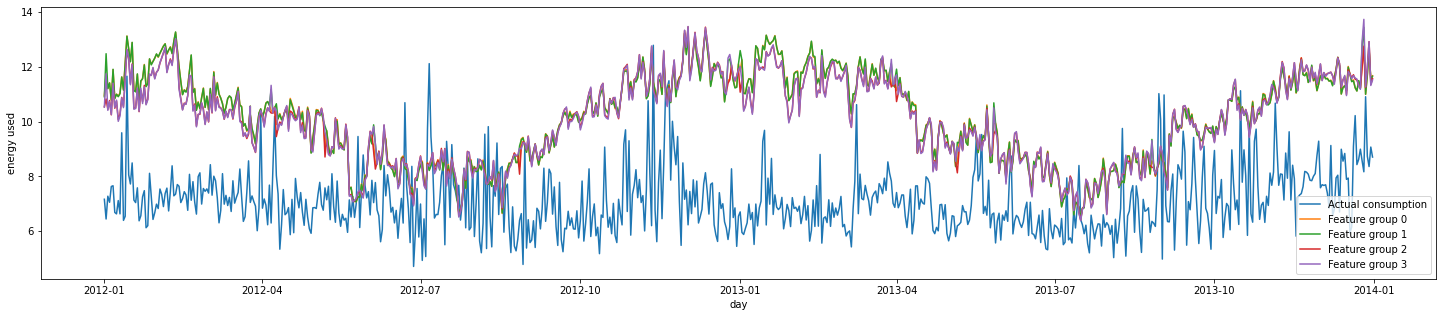

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               3.151442318182913       0.4658176486349187      12.385268295252876      3.5192709891755816      -8.09316391217897      
1               3.159131973617376       0.4668733369395326      12.453074857475073      3.528891448808687       -8.142946942300659     
2               3.0477344859346553      0.4509457098135252      11.522670888791618      3.3945059859708038      -7.459851865949087     
3               3.0587164705440975      0.4524587583591964      11.613344712231871      3.407835781288745       -7.5264238544947215    


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, y_train, y_test, acorn_groups_pearson, comfortable_households_test)

#Pearson on individual results - all
visualise_results(comfortable_households_test[0], household_1_predictions)

get_performance(comfortable_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

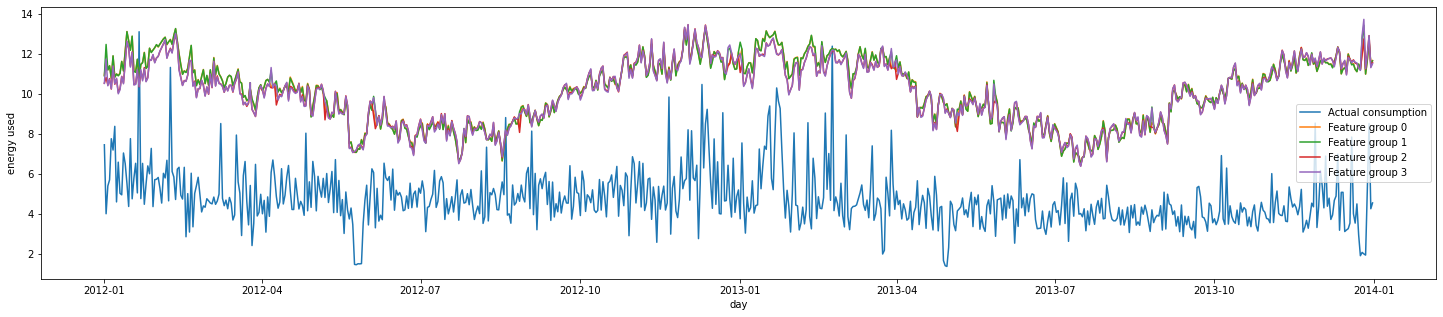

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               5.40267734568248        1.2893454529785229      32.22967413481364       5.677118471091972       -15.44984772266103     
1               5.409076512683393       1.2912163506751446      32.33144735994611       5.6860748640820855      -15.501792214829035    
2               5.295642140048543       1.2672558231965847      30.98526733495888       5.566441173223596       -14.814709362991941    
3               5.303573907010438       1.2696139339536403      31.11696687377105       5.578258408658661       -14.881928080424297    


In [ ]:
#Pearson on individual results - all
visualise_results(comfortable_households_test[1], household_2_predictions)

get_performance(comfortable_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

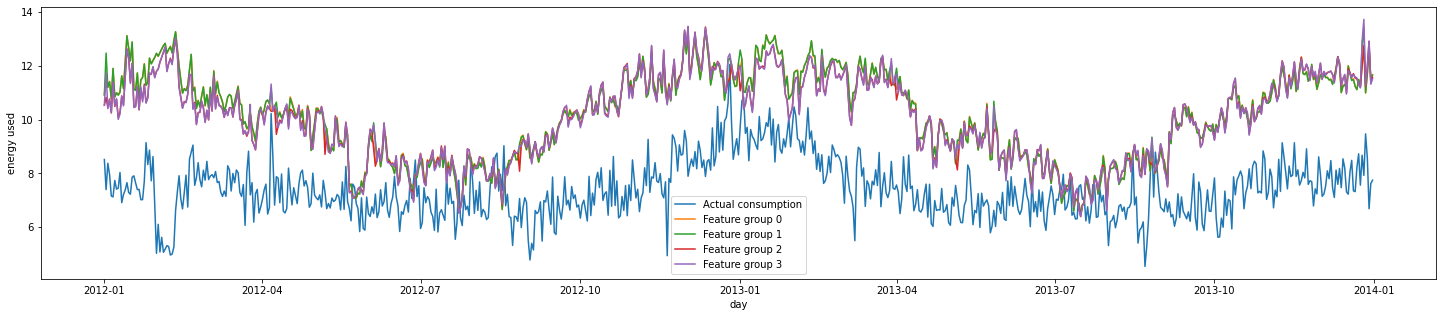

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.7887884835964774      0.38982826720971664     9.565913843170913       3.092881155681691       -7.5384100778323955    
1               2.792340384620425       0.39020161295439787     9.594595050967927       3.097514334263512       -7.5640105502716555    
2               2.6856004068614947      0.37657298504032716     8.897125212937926       2.982804923714913       -6.9414580590351855    
3               2.691396821646542       0.37720506759516387     8.936457969715255       2.9893909027952925      -6.976565965332734     


In [ ]:
#Pearson on individual results - all
visualise_results(comfortable_households_test[2], household_3_predictions)

get_performance(comfortable_households_test[2], household_3_predictions)

#### Comfortable households - mutual information



-- Overall model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               5.083130737269007       93884264649116.4        58.22153123514904       7.630303482506383       0.038678019413004194   
1               5.084470563011371       93931863284488.22       58.22323525079777       7.630415142755849       0.03864988364151822    
2               5.078774998367078       93938916925659.2        58.176694799745164      7.6273648660428695      0.03941833403494055    
3               5.082435025543177       94193144985901.73       58.1696128563161        7.6269006061647415      0.039535267199342194   


<Figure size 432x288 with 0 Axes>

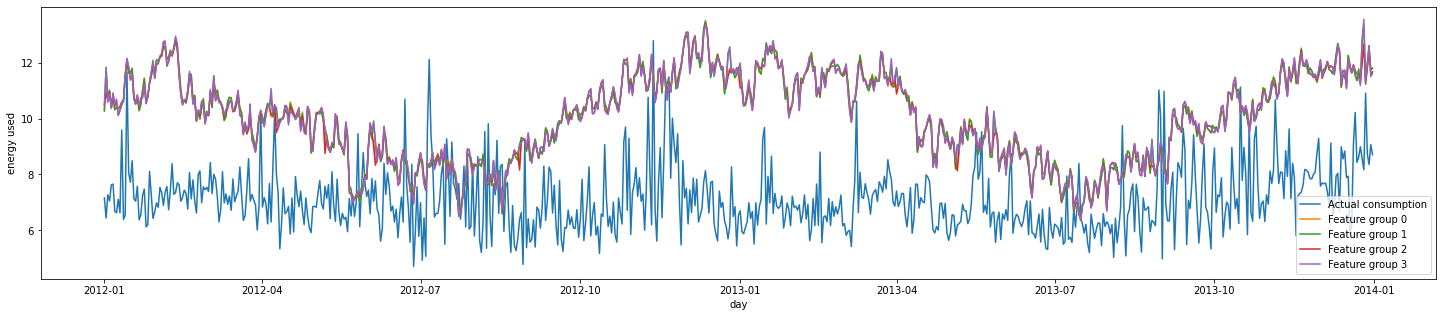

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               3.0475366020210615      0.45085590027833644     11.493420502671274      3.3901947588112504      -7.438376468796102     
1               3.053785446070203       0.4517217025407611      11.546489033892572      3.3980125123213676      -7.477338955636924     
2               3.043257904801837       0.4502645407387651      11.467534726584216      3.3863748650414083      -7.419371341144261     
3               3.063271463549297       0.45319324477340167     11.609627722112037      3.4072903783082586      -7.523694870381187     


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, y_train, y_test, acorn_groups_mutual_information, comfortable_households_test)

#Pearson on individual results - all
visualise_results(comfortable_households_test[0], household_1_predictions)

get_performance(comfortable_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

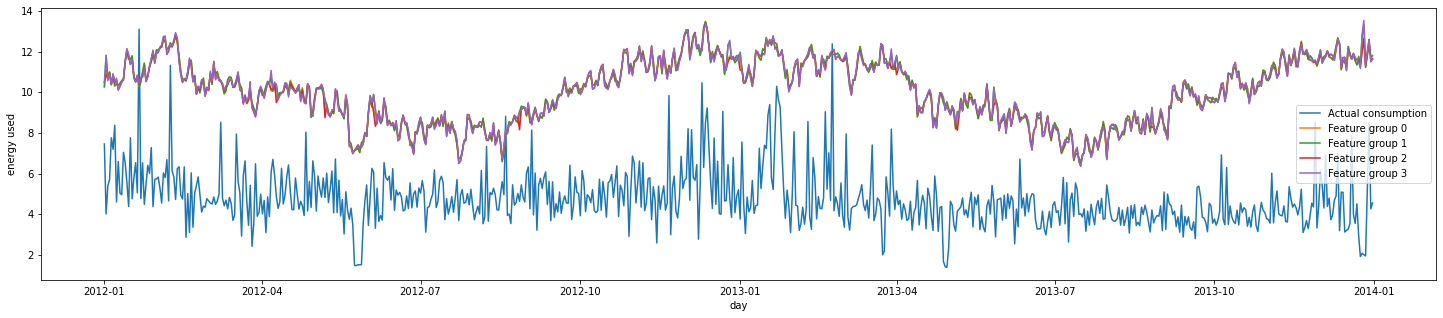

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               5.298970248508717       1.268376345891289       30.994735841276526      5.567291607350609       -14.819542036336227    
1               5.304429637019337       1.269944923310922       31.07648539774371       5.574628722860717       -14.861266558577912    
2               5.2885747696413485      1.2660943706662615      30.913696172509695      5.5600086486002605      -14.778179836857168    
3               5.3082937445236755      1.2710556137974378      31.148978550690654      5.5811269964668115      -14.898266663571981    


In [ ]:
#Pearson on individual results - all
visualise_results(comfortable_households_test[1], household_2_predictions)

get_performance(comfortable_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

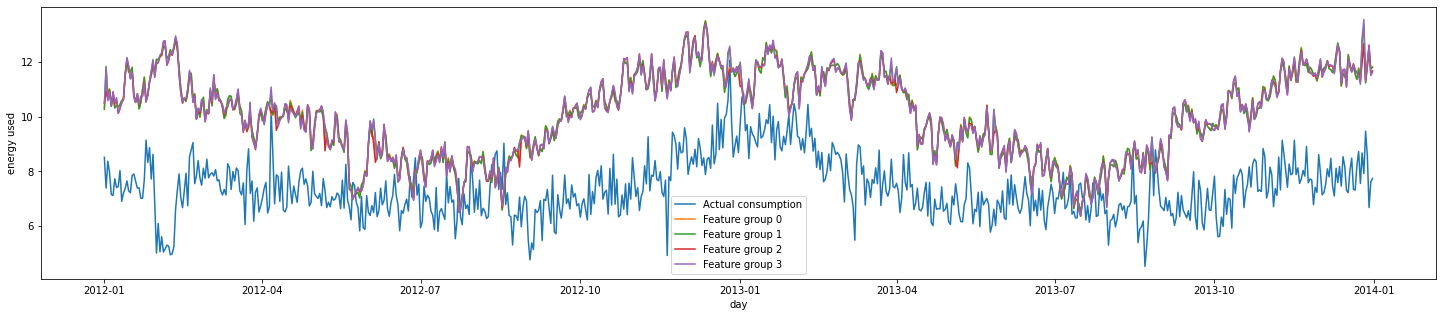

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.6839887497667205      0.37632690705873745     8.87036968030719        2.978316584969971       -6.917576419162885     
1               2.6866470436022762      0.37661384473472925     8.892008340196544       2.981947071997849       -6.936890805085558     
2               2.679038034604108       0.37571622226248175     8.848485147408207       2.9746403391684524      -6.898042570194892     
3               2.6953105397318464      0.3779002889973064      8.942341695454607       2.9903748419645666      -6.98181770227828      


In [ ]:
#Pearson on individual results - all
visualise_results(comfortable_households_test[2], household_3_predictions)

get_performance(comfortable_households_test[2], household_3_predictions)

#### Save best result

In [ ]:
household_1_predictions, household_2_predictions, household_3_predictions

#Household1
save_best_results(household_1_predictions, 2, "comfortable", "household_1")
save_best_results(household_2_predictions, 2, "comfortable", "household_2")
save_best_results(household_3_predictions, 2, "comfortable", "household_3")

## Adversity dataset only


### 1.1 Load the full dataset

In [ ]:
X_train = pd.read_csv(full_path + '/daily/daily_adversity_training.csv')
y_train = X_train['energy_sum']

X_test = pd.read_csv(full_path + '/daily/daily_adversity_testing.csv')
y_test = X_test['energy_sum']

#Drop the unneeded energy_sum column in the X dataset
X_train.drop(['energy_sum'], axis=1, inplace=True)
X_test.drop(['energy_sum'], axis=1, inplace=True)

#Check layout
X_train.head()

LCLid       day_x  day_of_week  day_of_month  month  \
0  MAC000102  2012-01-01            6             1      1   
1  MAC000102  2012-01-02            0             2      1   
2  MAC000102  2012-01-03            1             3      1   
3  MAC000102  2012-01-04            2             4      1   
4  MAC000102  2012-01-05            3             5      1   

   Acorn_grouped_Adversity  Acorn_grouped_Affluent  Acorn_grouped_Comfortable  \
0                      1.0                     0.0                        0.0   
1                      1.0                     0.0                        0.0   
2                      1.0                     0.0                        0.0   
3                      1.0                     0.0                        0.0   
4                      1.0                     0.0                        0.0   

   temperatureLow  temperatureHigh  dewPoint  cloudCover  windSpeed  pressure  \
0            5.18            12.56      9.45        0.58       4.92   1004.82   
1            4.69             7.57      2.80        0.21       4.81   1008.49   
2            5.27            12.41      5.73        0.48       8.47   1003.23   
3            8.16             8.21      3.38        0.49       7.98   1014.07   
4            4.40            11.04      4.28        0.47       9.49   1004.74   

   visibility  humidity  uvIndex  moonPhase  weather_type_clear-day  \
0       12.33      0.90      1.0       0.26                     0.0   
1       13.23      0.81      1.0       0.29                     0.0   
2       10.80      0.82      1.0       0.32                     0.0   
3       12.62      0.78      1.0       0.35                     0.0   
4       12.92      0.70      1.0       0.38                     0.0   

   weather_type_cloudy  weather_type_fog  weather_type_partly-cloudy-day  \
0                  0.0               0.0                             1.0   
1                  0.0               0.0                             1.0   
2                  0.0               0.0                             0.0   
3                  0.0               0.0                             0.0   
4                  0.0               0.0                             0.0   

   weather_type_partly-cloudy-night  weather_type_wind  public_holiday  day_y  
0                               0.0                0.0               0    733  
1                               0.0                0.0               1    733  
2                               0.0                1.0               0    733  
3                               0.0                1.0               0    733  
4                               0.0                1.0               0    733

### 1.2 Fit and Plot results

#### Adversity households - pearson


-- Overall model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               4.617104899888959       182666956056674.6       41.07046096246888       6.4086239523371065      0.02956649798322375    
1               4.618982071255672       182804036598508.34      41.07267878964583       6.408796984586563       0.02951409404755423    
2               4.672079818695016       185770471804606.72      41.11870650803817       6.412386958694724       0.028426527974454996   
3               4.674673008253793       185979023829093.3       41.12389379705027       6.412791420048704       0.028303960101487058   


<Figure size 432x288 with 0 Axes>

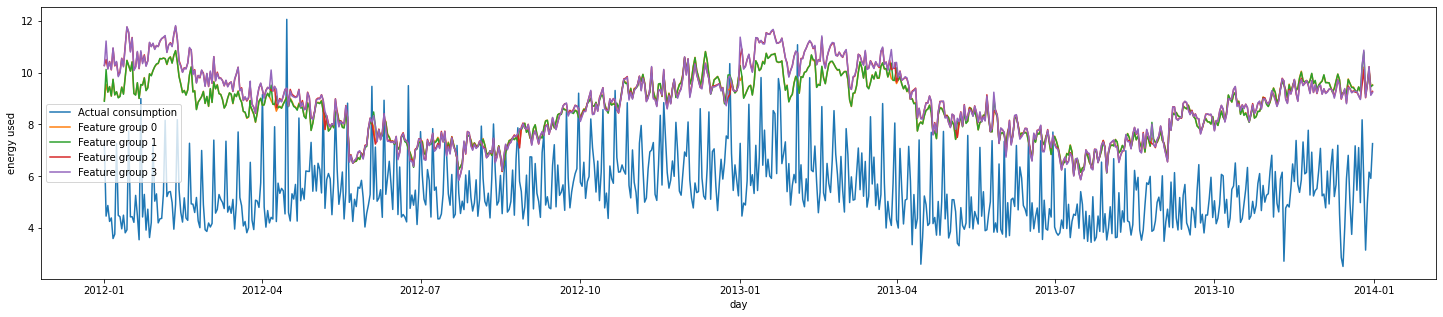

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               3.1542516102945966      0.6449016750028064      11.843730558926556      3.4414721499565495      -5.612101744746796     
1               3.1587031808185375      0.6459468011762807      11.89155298806403       3.44841311157234        -5.638799985268622     
2               3.343422125714972       0.680775831274033       13.534197873753474      3.6788854118813585      -6.55585353192166      
3               3.3478592762659947      0.6817399315627429      13.58628703262519       3.6859580888318835      -6.584933796500837     


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, y_train, y_test, acorn_groups_pearson, adversity_households_test)

#Pearson on individual results - all
visualise_results(adversity_households_test[0], household_1_predictions)

get_performance(adversity_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

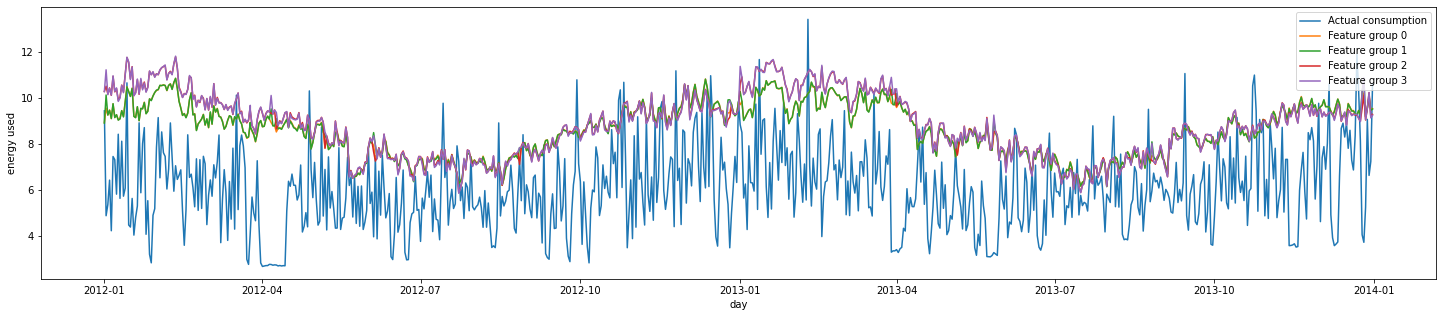

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.7307015895440725      0.574869842861508       10.10946328468708       3.1795382187806895      -2.123662862627314     
1               2.7363214871127646      0.5764509602889657      10.177940709486803      3.1902884994129925      -2.1448212943611966    
2               2.9221725724798984      0.609546199466652       11.599184944708693      3.405757616846609       -2.5839630876758153    
3               2.9283124034562005      0.6114986901846713      11.694791360656387      3.4197648107225715      -2.6135039448424924    


In [ ]:
#Pearson on individual results - all
visualise_results(adversity_households_test[1], household_2_predictions)

get_performance(adversity_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

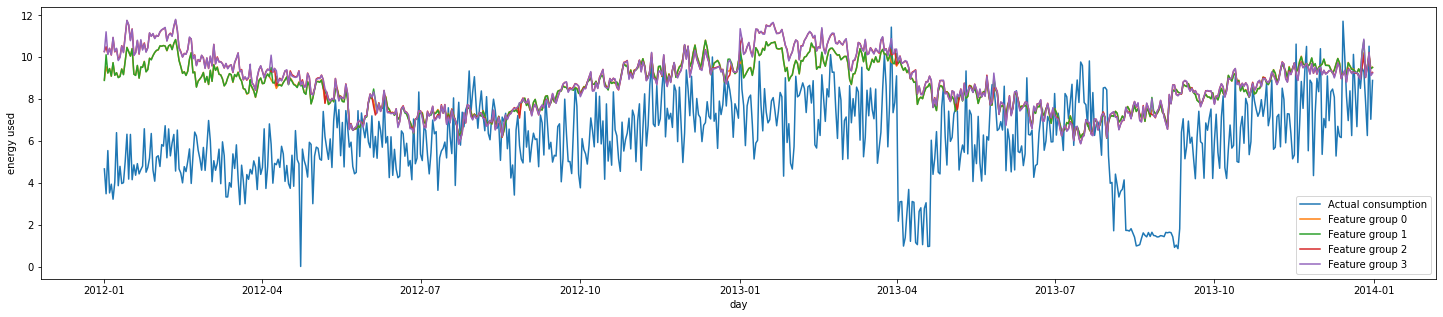

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.6965909849163725      3.6751614020712386      10.457313567230514      3.2337769816780058      -1.7065659774603459    
1               2.6998357787237923      3.6698989500757144      10.470957297666244      3.235885859801956       -1.7100972530949123    
2               2.8994336341853617      3.7401127311394036      12.144441261176288      3.4848875535914052      -2.1432290254513697    
3               2.9052496114683635      3.722983666769924       12.161650702415857      3.4873558324919838      -2.147683179747372     


In [ ]:
#Pearson on individual results - all
visualise_results(adversity_households_test[2], household_3_predictions)

get_performance(adversity_households_test[2], household_3_predictions)

#### Adversity households - mutual information 


-- Overall model performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               4.676029166179607       185975799299903.0       41.14105488297821       6.4141293160473625      0.02789846933451756    
1               4.677715824898773       186100125457577.94      41.14515942758384       6.414449269234565       0.027801485090793943   
2               4.678283908609679       186439648997943.97      41.119934569886546      6.412482714977604       0.028397510711627105   
3               4.678641881003521       186496175614164.56      41.11800509690439       6.412332266570751       0.02844310126939653    


<Figure size 432x288 with 0 Axes>

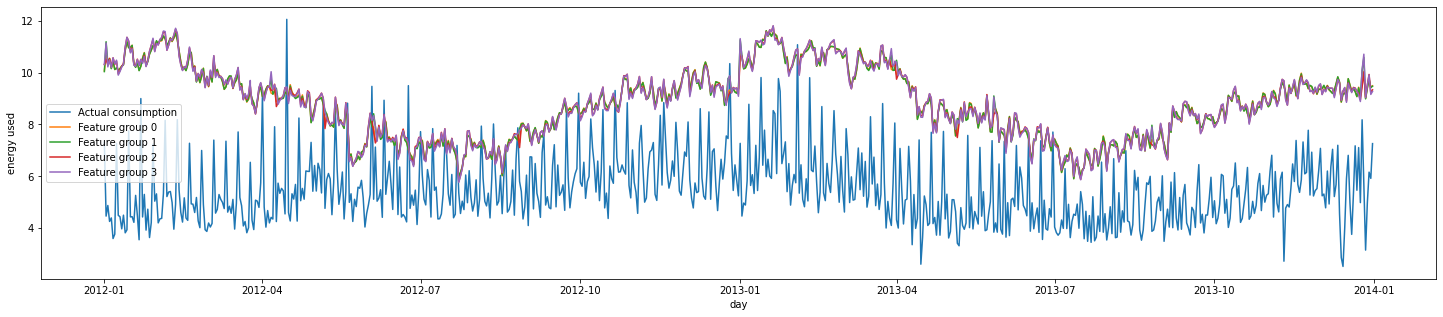

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               3.3538769230733183      0.6837525368825974      13.63811154890639       3.6929813902735         -6.613866316775484     
1               3.35794292273711        0.6847401773224681      13.685274319256223      3.699361339374166       -6.640196283888943     
2               3.3594647211033437      0.68395169894277        13.651957712602963      3.694855573984315       -6.62159633416153      
3               3.3576839516176125      0.6836993704000336      13.654691906608502      3.6952255555795914      -6.623122776262231     


In [ ]:
#Pass in the dataset, run the model and then plot the results

household_1_predictions, household_2_predictions, household_3_predictions = run_model(X_train, X_test, y_train, y_test, acorn_groups_mutual_information, adversity_households_test)

#Pearson on individual results - all
visualise_results(adversity_households_test[0], household_1_predictions)

get_performance(adversity_households_test[0], household_1_predictions)

<Figure size 432x288 with 0 Axes>

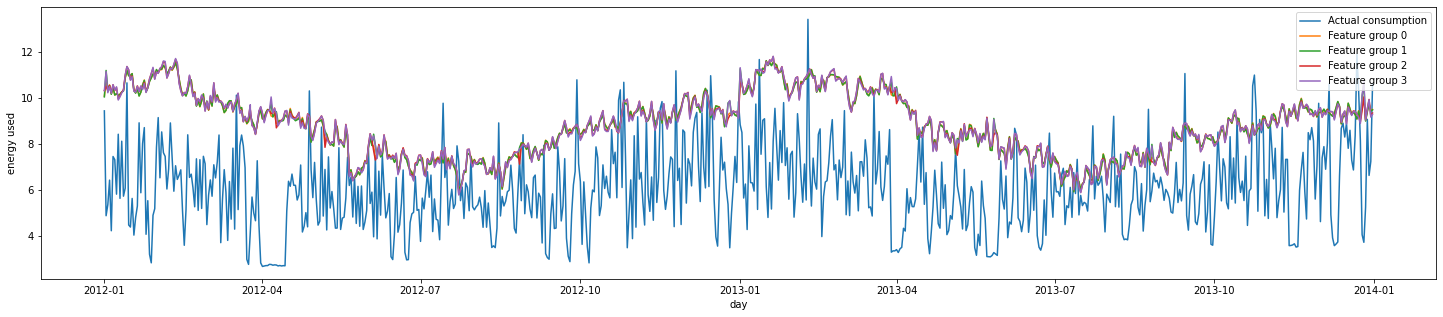

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.927605518260076       0.6102613527181656      11.59558170007053       3.4052285826461826      -2.5828497425709136    
1               2.9329777462634743      0.611745424718592       11.660780329212868      3.414788475032219       -2.602995078758504     
2               2.938533423848202       0.6129739541236692      11.716365870180402      3.4229177422457004      -2.620170124072961     
3               2.9394594112670904      0.6138551631987923      11.7691286884189        3.430616371502197       -2.636472993099529     


In [ ]:
#Pearson on individual results - all
visualise_results(adversity_households_test[1], household_2_predictions)

get_performance(adversity_households_test[1], household_2_predictions)

<Figure size 432x288 with 0 Axes>

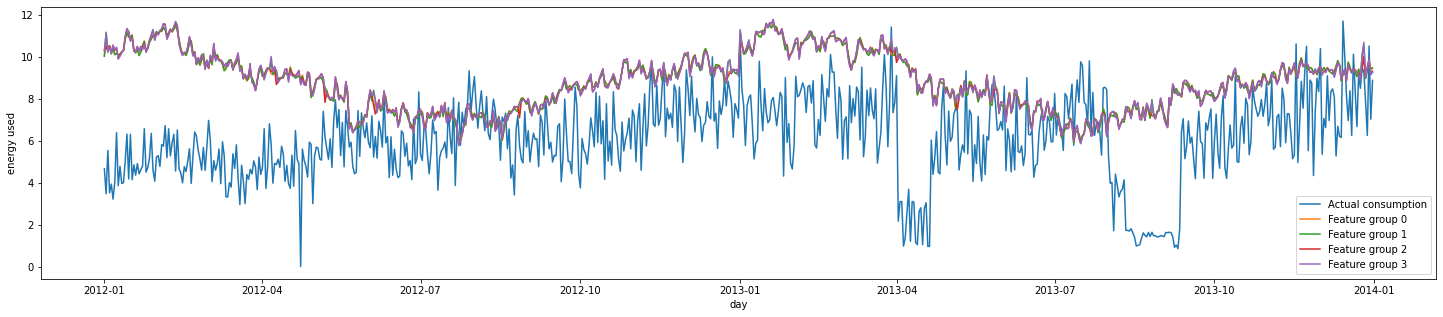

-- Test household forecasting performance per feature group: --

Feature group   MAE                     MAPE                    MSE                     RMSE                    R2                     
0               2.9067856537905405      3.811345360713119       12.167727679117121      3.488227010834748       -2.1492560252281656    
1               2.91099413802246        3.803178851939671       12.183087665377842      3.4904280060442217      -2.153231502864965     
2               2.9146505161109504      3.750607149862616       12.241872057058883      3.4988386726253733      -2.1684461020549692    
3               2.914069929059714       3.7255965484665734      12.221269998551044      3.4958933048007976      -2.1631138692339418    


In [ ]:
#Pearson on individual results - all
visualise_results(adversity_households_test[2], household_3_predictions)

get_performance(adversity_households_test[2], household_3_predictions)

#### Save best results

In [ ]:
household_1_predictions, household_2_predictions, household_3_predictions

#Household1
save_best_results(household_1_predictions, 0, "adversity", "household_1")
save_best_results(household_2_predictions, 0, "adversity", "household_2")
save_best_results(household_3_predictions, 0, "adversity", "household_3")